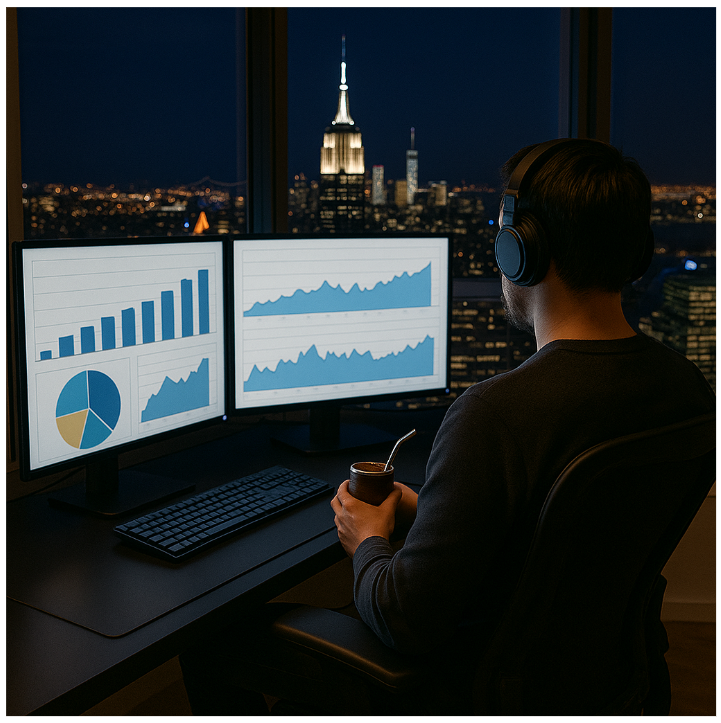

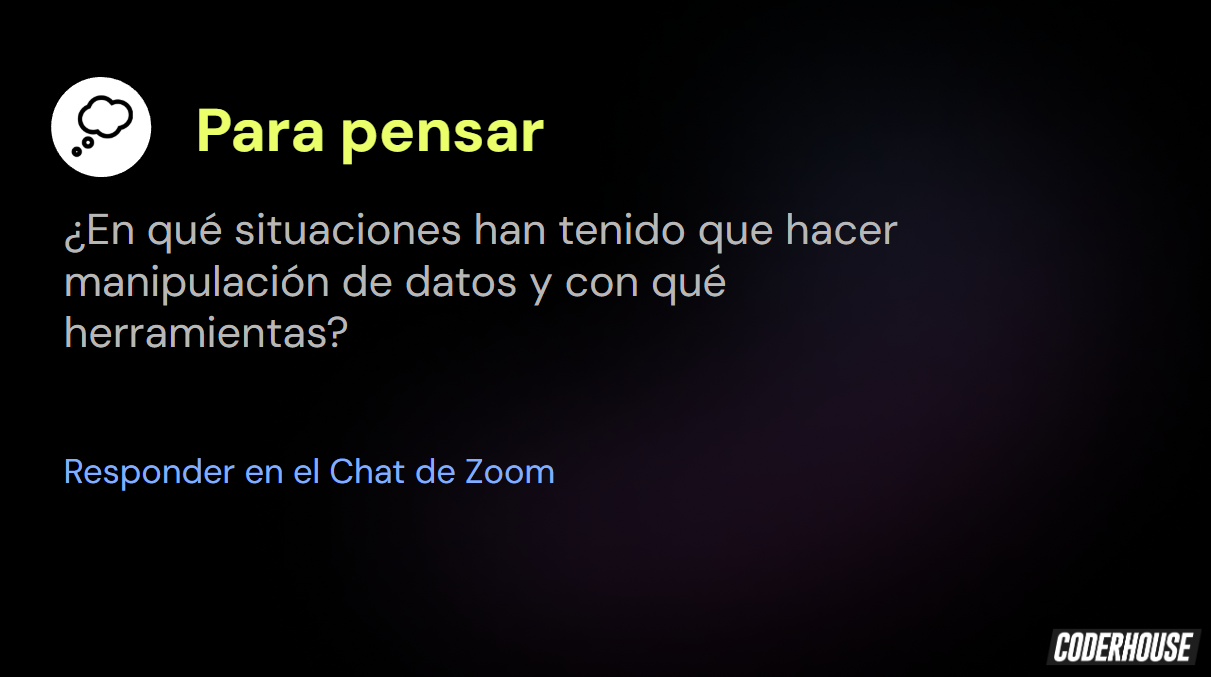

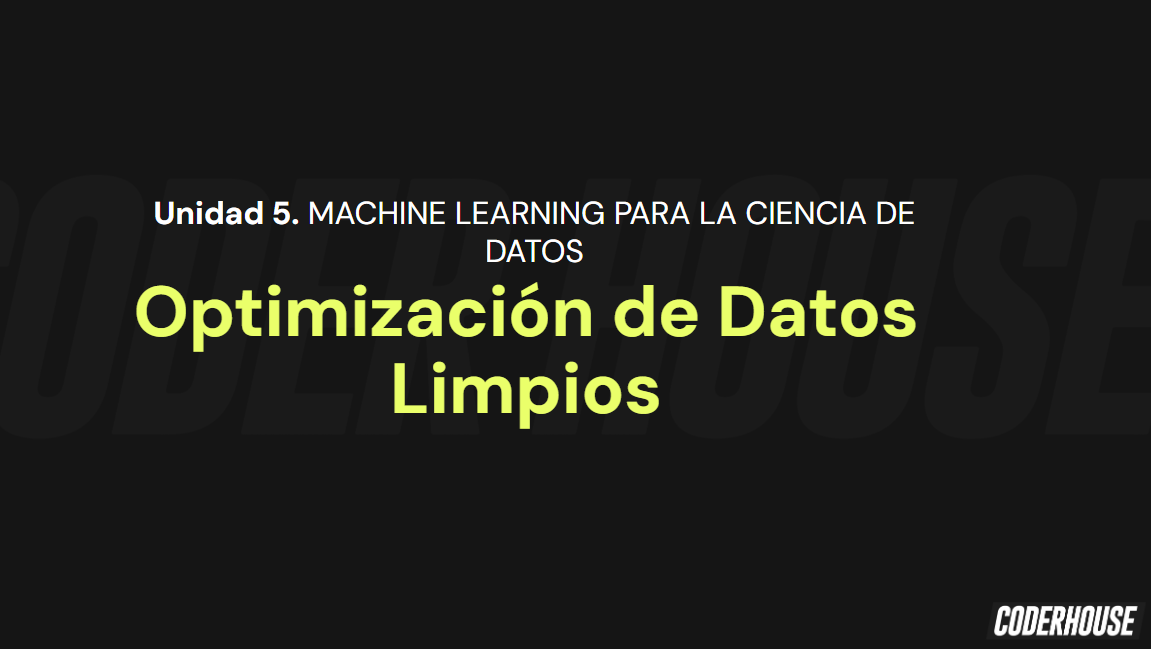

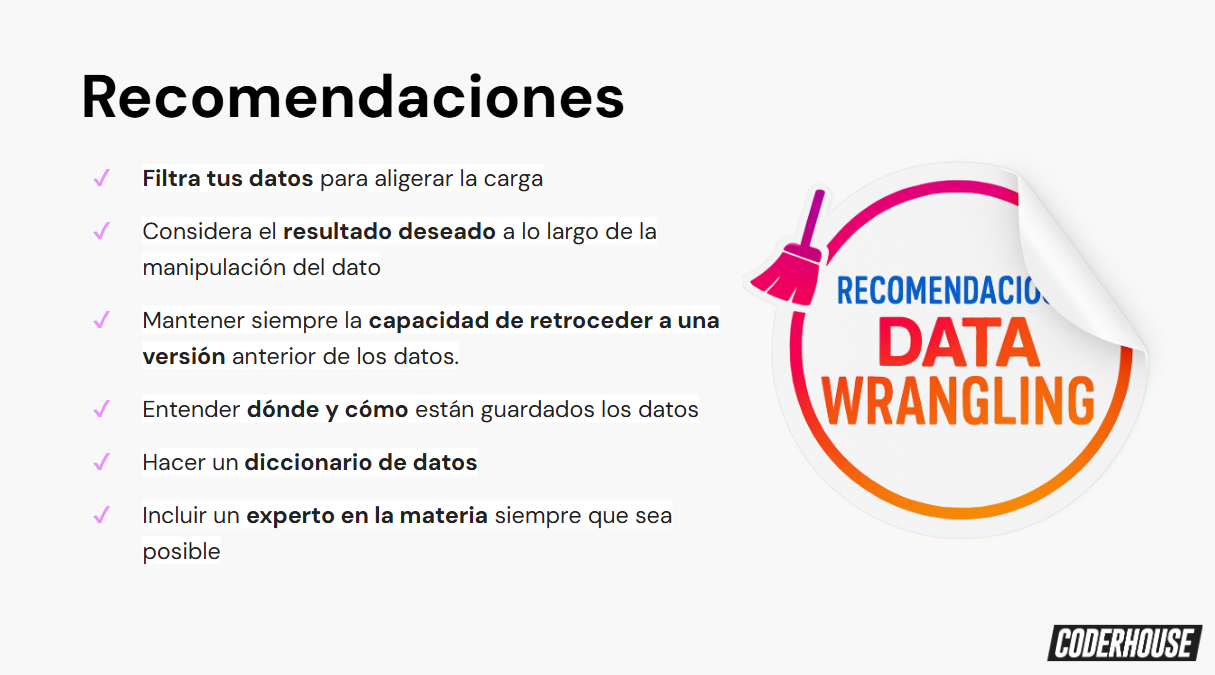

🍎 Estas son las columnas disponibles:

- fecha_cobranza

- cliente

- metodo_pago

- estado_pago

- monto_total

- saldo_pendiente

- tipo_cuenta

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar los datos
df = pd.read_csv("/content/drive/MyDrive/CODERHOUSE DATA SCIENCE /DATA SCIENCE 2/CLASE 5/dataset_cobranzas_simulado.csv")
df

fecha_cobranza    cliente    metodo_pago estado_pago  monto_total  \
0       2025-04-15  Cliente D       Efectivo      Pagado     21244.68   
1       2025-03-03  Cliente B  Transferencia      Impago     30169.01   
2       2025-03-29  Cliente B         Cheque     Parcial      7547.38   
3       2025-04-04  Cliente A         Débito      Pagado     24725.21   
4       2025-04-08  Cliente A            NaN      Pagado     48634.54   
..             ...        ...            ...         ...          ...   
500     2025-03-01  Cliente D       Efectivo         NaN     17945.19   
501     2025-04-24  Cliente B         Débito     Parcial     27883.05   
502     2025-03-10  Cliente A         Débito      Pagado     48551.74   
503     2025-04-01  Cliente A         Cheque      Pagado     41142.32   
504     2025-04-08  Cliente C       Efectivo      Impago     40650.46   

     saldo_pendiente      tipo_cuenta  
0               0.00          Crédito  
1            7542.25  Cuenta Especial  
2               0.00          Crédito  
3               0.00  Cuenta Especial  
4               0.00          Crédito  
..               ...              ...  
500          8972.59  Cuenta Especial  
501         13941.52          Contado  
502             0.00          Contado  
503             0.00  Cuenta Especial  
504             0.00          Crédito  

[505 rows x 7 columns]

In [ ]:
# 2. FILTRAR DATOS → solo cobranzas pagadas
df_filtrado = df[df['estado_pago'] == 'Pagado']
df_filtrado


fecha_cobranza    cliente metodo_pago estado_pago  monto_total  \
0       2025-04-15  Cliente D    Efectivo      Pagado     21244.68   
3       2025-04-04  Cliente A      Débito      Pagado     24725.21   
4       2025-04-08  Cliente A         NaN      Pagado     48634.54   
6       2025-03-20  Cliente D      Débito      Pagado     12901.18   
9       2025-04-27  Cliente C      Débito      Pagado     36665.00   
..             ...        ...         ...         ...          ...   
495     2025-04-29  Cliente C      Débito      Pagado     16356.91   
497     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
499     2025-04-02  Cliente D      Cheque      Pagado     21307.85   
502     2025-03-10  Cliente A      Débito      Pagado     48551.74   
503     2025-04-01  Cliente A      Cheque      Pagado     41142.32   

     saldo_pendiente       tipo_cuenta  
0                0.0           Crédito  
3                0.0   Cuenta Especial  
4                0.0           Crédito  
6                NaN           Contado  
9                0.0  Cuenta Corriente  
..               ...               ...  
495              0.0   Cuenta Especial  
497              0.0   Cuenta Especial  
499              0.0   Cuenta Especial  
502              0.0           Contado  
503              0.0   Cuenta Especial  

[309 rows x 7 columns]

In [ ]:
# 3. CONSIDERAR EL RESULTADO DESEADO → Total cobrado por método de pago y tipo de cuenta

# 1. Crear una copia explícita al filtrar
df_filtrado = df[df['estado_pago'] == 'Pagado'].copy()

# 2. Convertir fechas y crear columna 'mes' correctamente
df_filtrado['fecha_cobranza'] = pd.to_datetime(df_filtrado['fecha_cobranza'])
df_filtrado['mes'] = df_filtrado['fecha_cobranza'].dt.to_period('M')
# 3. Agrupar por mes, método de pago y tipo de cuenta
resumen = df_filtrado.groupby(['mes', 'metodo_pago', 'tipo_cuenta'])['monto_total'].sum().reset_index()

resumen


In [ ]:
# 4. COPIA DE SEGURIDAD PARA VOLVER ATRÁS
df_backup = df.copy()
df_backup

In [ ]:
# 5. ENTENDER DÓNDE Y CÓMO ESTÁN LOS DATOS
print(df.dtypes)
print(df.isnull().sum())



fecha_cobranza      object
cliente             object
metodo_pago         object
estado_pago         object
monto_total        float64
saldo_pendiente    float64
tipo_cuenta         object
dtype: object
fecha_cobranza      0
cliente             0
metodo_pago        20
estado_pago        21
monto_total         0
saldo_pendiente    20
tipo_cuenta         0
dtype: int64


In [ ]:
# 6. DICCIONARIO DE DATOS
diccionario_datos = {
    "fecha_cobranza": "Fecha en que se registró la cobranza",
    "cliente": "Nombre del cliente",
    "metodo_pago": "Medio utilizado para realizar el pago",
    "estado_pago": "Estado del pago (Pagado, Impago, Parcial)",
    "monto_total": "Monto total cobrado en ARS",
    "saldo_pendiente": "Saldo que aún resta abonar",
    "tipo_cuenta": "Tipo de cuenta del cliente"
}

diccionario_datos

{'fecha_cobranza': 'Fecha en que se registró la cobranza',
 'cliente': 'Nombre del cliente',
 'metodo_pago': 'Medio utilizado para realizar el pago',
 'estado_pago': 'Estado del pago (Pagado, Impago, Parcial)',
 'monto_total': 'Monto total cobrado en ARS',
 'saldo_pendiente': 'Saldo que aún resta abonar',
 'tipo_cuenta': 'Tipo de cuenta del cliente'}

🍎 En Data Wrangling, usar un diccionario de datos no se refiere a un diccionario de Python (dict), sino a una documentación que explica qué significa cada columna y qué tipo de datos contiene.

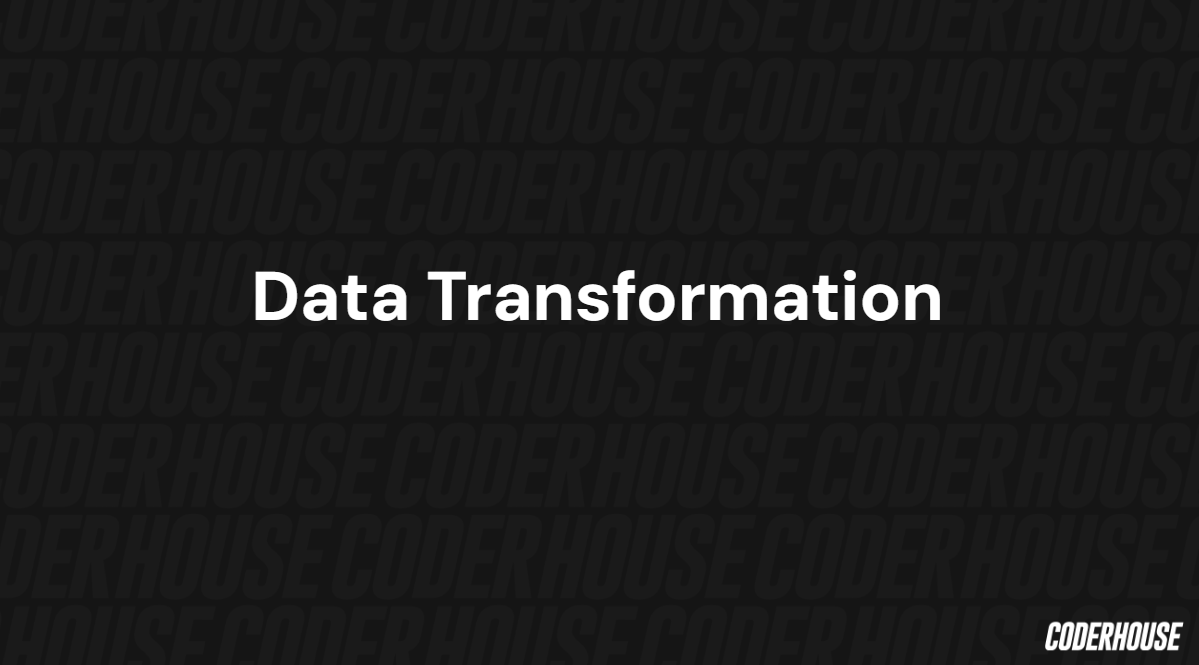

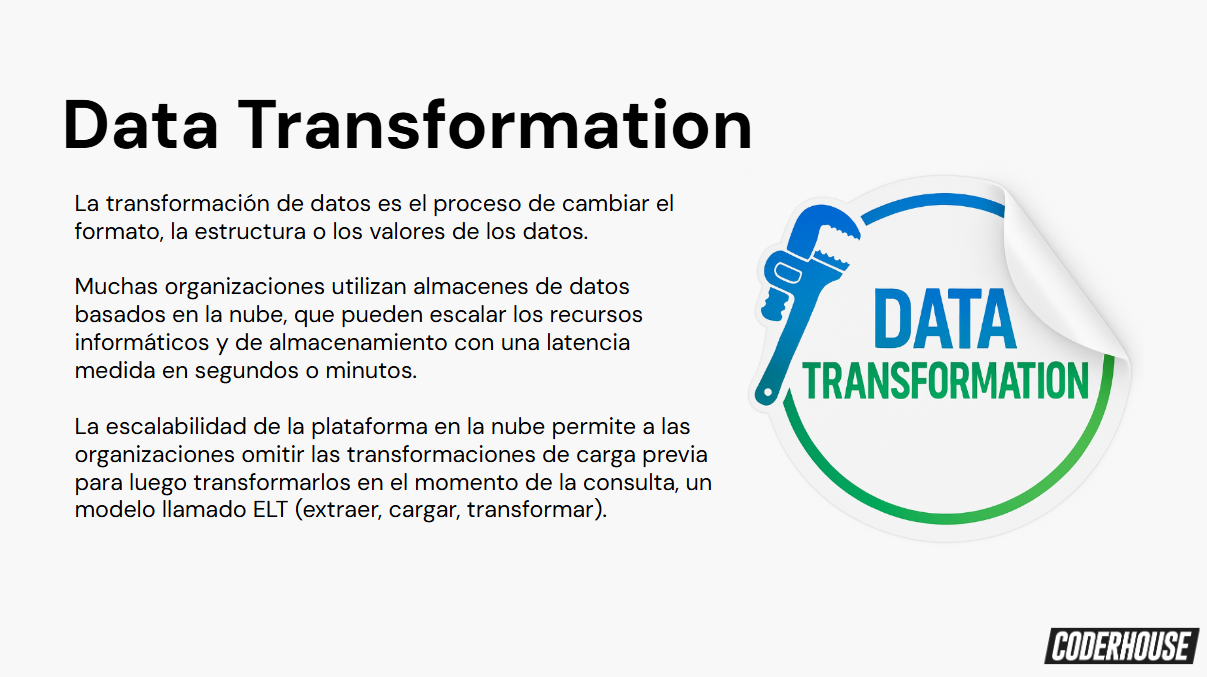

📌 **Procesos Involucrados**

- Ingesta de datos desde diversas fuentes.

- Limpieza y depuración (corrección de errores, duplicados, etc.).

- Estandarización y transformación de formatos y estructuras.

- Validación y calidad de datos.

- Almacenamiento en destino final (data warehouse, lago de datos, etc.).

✅ **Beneficios**

- Mejora en la calidad y confiabilidad de los datos.

- Facilita la integración entre sistemas y fuentes.

- Permite análisis más rápidos y efectivos.

- Mejora la toma de decisiones basada en datos.

- Reducción de redundancias y errores.

⚠️ **Desafíos**

- Complejidad técnica y operativa del proceso.

- Riesgo de pérdida de información si se transforma incorrectamente.

- Requiere herramientas y perfiles especializados.

- Alto consumo de tiempo y recursos si no se automatiza.

- Necesidad de documentación y trazabilidad constante.

In [ ]:
#Merge
df1=pd.read_csv('/content/drive/MyDrive/CODERHOUSE DATA SCIENCE /DATA SCIENCE 2/CLASE 5/Clientes_y_Provincias.csv')
# Unir la tabla de cobranzas con la de provincias por cliente
df_2 = pd.merge(df, df1, on='cliente', how='left') #con las provincias
df_2


fecha_cobranza    cliente    metodo_pago estado_pago  monto_total  \
0       2025-04-15  Cliente D       Efectivo      Pagado     21244.68   
1       2025-03-03  Cliente B  Transferencia      Impago     30169.01   
2       2025-03-29  Cliente B         Cheque     Parcial      7547.38   
3       2025-04-04  Cliente A         Débito      Pagado     24725.21   
4       2025-03-18  Cliente D         Cheque      Impago     21958.32   
..             ...        ...            ...         ...          ...   
441     2025-04-02  Cliente D         Cheque      Pagado     21307.85   
442     2025-04-24  Cliente B         Débito     Parcial     27883.05   
443     2025-03-10  Cliente A         Débito      Pagado     48551.74   
444     2025-04-01  Cliente A         Cheque      Pagado     41142.32   
445     2025-04-08  Cliente C       Efectivo      Impago     40650.46   

     saldo_pendiente      tipo_cuenta   provincia  
0               0.00          Crédito     Mendoza  
1            7542.25  Cuenta Especial  Corrientes  
2               0.00          Crédito  Corrientes  
3               0.00  Cuenta Especial       Salta  
4               0.00          Crédito     Mendoza  
..               ...              ...         ...  
441             0.00  Cuenta Especial     Mendoza  
442         13941.52          Contado  Corrientes  
443             0.00          Contado       Salta  
444             0.00  Cuenta Especial       Salta  
445             0.00          Crédito     Mendoza  

[446 rows x 8 columns]

In [ ]:
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha_cobranza   505 non-null    object 
 1   cliente          505 non-null    object 
 2   metodo_pago      485 non-null    object 
 3   estado_pago      484 non-null    object 
 4   monto_total      505 non-null    float64
 5   saldo_pendiente  485 non-null    float64
 6   tipo_cuenta      505 non-null    object 
 7   provincia        505 non-null    object 
dtypes: float64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
# fecha_cobranza   505 non-null    object
df_2['fecha_cobranza'] = pd.to_datetime(df_2['fecha_cobranza'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha_cobranza   505 non-null    datetime64[ns]
 1   cliente          505 non-null    object        
 2   metodo_pago      485 non-null    object        
 3   estado_pago      484 non-null    object        
 4   monto_total      505 non-null    float64       
 5   saldo_pendiente  485 non-null    float64       
 6   tipo_cuenta      505 non-null    object        
 7   provincia        505 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 31.7+ KB


In [ ]:
df_2['fecha_cobranza'].dtype

dtype('<M8[ns]')

🍎

M → Significa "datetime" (fecha/hora).

8 → Usa 8 bytes (64 bits) para almacenar la información.

ns → Unidad de tiempo: nanosegundos.

In [ ]:
#VER SI TENGO DUPLICADOS
df.duplicated().sum()

np.int64(5)

In [ ]:
#VER CUALES SON LOS DUPLICADOS
df[df.duplicated()]


fecha_cobranza    cliente metodo_pago estado_pago  monto_total  \
500     2025-03-01  Cliente D    Efectivo         NaN     17945.19   
501     2025-04-24  Cliente B      Débito     Parcial     27883.05   
502     2025-03-10  Cliente A      Débito      Pagado     48551.74   
503     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
504     2025-04-08  Cliente C    Efectivo      Impago     40650.46   

     saldo_pendiente      tipo_cuenta  
500          8972.59  Cuenta Especial  
501         13941.52          Contado  
502             0.00          Contado  
503             0.00  Cuenta Especial  
504             0.00          Crédito

In [ ]:
#VER TODAS LAS FILAS JUNTAS

df[df.duplicated(keep=False)]

#KEEP=FALSE -> Marca todas las filas duplicadas como True, incluyendo la primera aparición. Usar este parametro cuando quiero ver que duplicados hay.

fecha_cobranza    cliente metodo_pago estado_pago  monto_total  \
47      2025-04-24  Cliente B      Débito     Parcial     27883.05   
154     2025-03-01  Cliente D    Efectivo         NaN     17945.19   
279     2025-03-10  Cliente A      Débito      Pagado     48551.74   
435     2025-04-08  Cliente C    Efectivo      Impago     40650.46   
497     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
500     2025-03-01  Cliente D    Efectivo         NaN     17945.19   
501     2025-04-24  Cliente B      Débito     Parcial     27883.05   
502     2025-03-10  Cliente A      Débito      Pagado     48551.74   
503     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
504     2025-04-08  Cliente C    Efectivo      Impago     40650.46   

     saldo_pendiente      tipo_cuenta  
47          13941.52          Contado  
154          8972.59  Cuenta Especial  
279             0.00          Contado  
435             0.00          Crédito  
497             0.00  Cuenta Especial  
500          8972.59  Cuenta Especial  
501         13941.52          Contado  
502             0.00          Contado  
503             0.00  Cuenta Especial  
504             0.00          Crédito

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=['cliente', 'tipo_cuenta'])



fecha_cobranza    cliente metodo_pago estado_pago  monto_total  \
279     2025-03-10  Cliente A      Débito      Pagado     48551.74   
502     2025-03-10  Cliente A      Débito      Pagado     48551.74   
497     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
503     2025-04-01  Cliente A      Cheque      Pagado     41142.32   
47      2025-04-24  Cliente B      Débito     Parcial     27883.05   
501     2025-04-24  Cliente B      Débito     Parcial     27883.05   
435     2025-04-08  Cliente C    Efectivo      Impago     40650.46   
504     2025-04-08  Cliente C    Efectivo      Impago     40650.46   
154     2025-03-01  Cliente D    Efectivo         NaN     17945.19   
500     2025-03-01  Cliente D    Efectivo         NaN     17945.19   

     saldo_pendiente      tipo_cuenta  
279             0.00          Contado  
502             0.00          Contado  
497             0.00  Cuenta Especial  
503             0.00  Cuenta Especial  
47          13941.52          Contado  
501         13941.52          Contado  
435             0.00          Crédito  
504             0.00          Crédito  
154          8972.59  Cuenta Especial  
500          8972.59  Cuenta Especial

In [ ]:

df3 = df.drop_duplicates()

print(df.size)
print(df3.size)


3535
3500


🍎 7 columnas, entonces:

3535 / 7 ≈ 505 filas

3500 / 7 = 500 filas

In [ ]:
#Filas
print(df.shape[0])    # Número de filas antes
print(df3.shape[0])   # Número de filas después


505
500


In [ ]:
len(df)     # antes
len(df3)    # después

500

In [ ]:
#VALORES NULOS

df.isnull().sum()

fecha_cobranza      0
cliente             0
metodo_pago        20
estado_pago        21
monto_total         0
saldo_pendiente    20
tipo_cuenta         0
dtype: int64

In [ ]:
#ELIMINAR
df = df.dropna()

#REEMPLAZAR
df['metodo_pago'] = df['metodo_pago'].fillna('Desconocido')


In [ ]:
df.isnull().sum()

fecha_cobranza     0
cliente            0
metodo_pago        0
estado_pago        0
monto_total        0
saldo_pendiente    0
tipo_cuenta        0
dtype: int64

In [ ]:
#Correccion de Errores

df['estado_pago'].value_counts()

estado_pago
Pagado     283
Parcial    101
Impago      62
Name: count, dtype: int64

In [ ]:
# df['estado_pago'] = df['estado_pago'].replace({'Pagadoo': 'Pagado'})

In [ ]:
df['monto_total'].describe()

count      446.000000
mean     26097.803767
std      14512.931152
min       1158.260000
25%      13402.820000
50%      27277.460000
75%      39939.682500
max      49982.570000
Name: monto_total, dtype: float64

In [ ]:
#ver columnas unicas para verificar la integridad de los datos

df['tipo_cuenta'].unique()


array(['Crédito', 'Cuenta Especial', 'Cuenta Corriente', 'Contado'],
      dtype=object)

# **🍎 INFO PARA SUMAR**

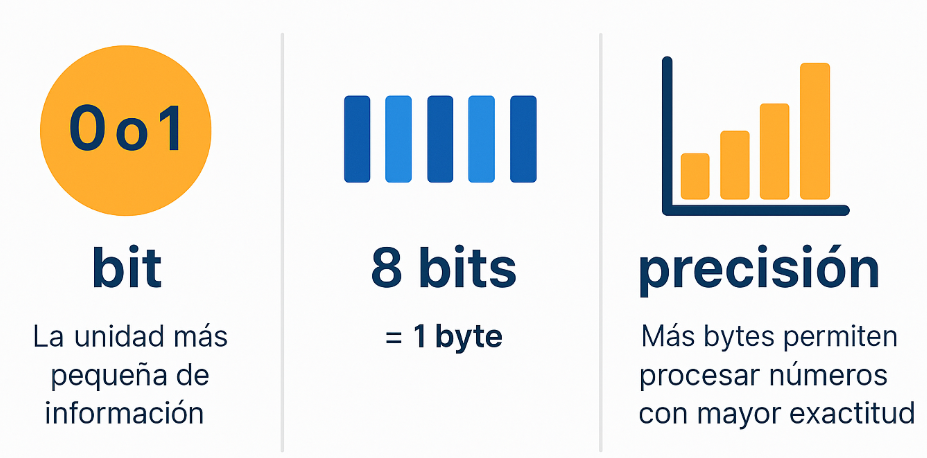

* En ciencia de datos, cuando guardamos fechas, montos, texto, o imágenes, todo se guarda como una larga cadena de bits y bytes.
Por ejemplo, una fecha en Pandas (datetime64[ns]) usa 64 bits para representar hasta el nanosegundo.
Eso permite hacer cálculos súper precisos y manejar rangos de fechas enormes

* ¿Entonces más bytes = mejor?
Más bytes = más precisión, pero también más consumo de memoria.
En ciencia de datos siempre hay que encontrar el equilibrio entre tener la precisión necesaria sin hacer que el análisis sea lento o pesado.

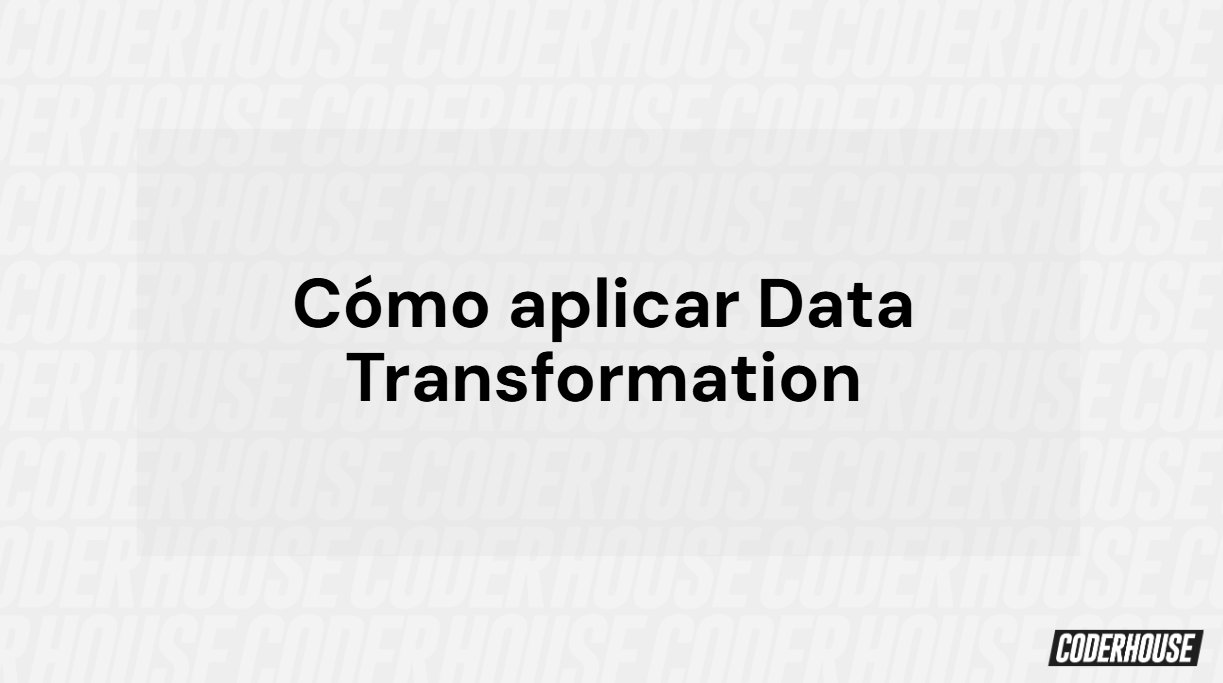

 🔤 **Traducción y Mapping**

- Conversión de valores entre idiomas, códigos o etiquetas.

- Uso de diccionarios o funciones como map() para estandarizar datos.

- Ideal para normalizar categorías o nombres en distintos formatos.

📊 **Filtros, agregación y summary**

- Filtrado de registros relevantes según condiciones.

- Agrupación y aplicación de funciones como suma, promedio, conteo.

- Generación de resúmenes estadísticos para exploración de datos.

➕ **Enriquecimiento e imputación**

- Agregado de columnas con datos externos o derivados.

- Relleno de valores faltantes mediante medias, modas o interpolación.

- Mejora la completitud del dataset para análisis más robustos.

🔍 **Indexamiento y ordenamiento**

- Creación o redefinición de índices para acceder más eficientemente.

- Ordenación de datos por columnas específicas, ascendente o descendente.

- Mejora la organización y navegabilidad del dataset.

In [ ]:
#Traducción y Mapping
#Objetivo: estandarizar nombres o codificar variables.
# Paso 1: Crear un diccionario de traducción
traduccion_estado = {
    'Pagado': 'paid',
    'Impago': 'unpaid',
    'Parcial': 'partial'
}

# Paso 2: Aplicar la traducción usando .map() y evitar el warning usando .loc
df.loc[:, 'estado_pago_en'] = df['estado_pago'].map(traduccion_estado)

# Paso 3: Mostrar los primeros registros para verificar
print(df[['estado_pago', 'estado_pago_en']].head())

# Paso 4 (opcional): Ver valores únicos traducidos
print("Valores originales:", df['estado_pago'].unique())
print("Valores traducidos:", df['estado_pago_en'].unique())


  estado_pago estado_pago_en
0      Pagado           paid
1      Impago         unpaid
2     Parcial        partial
3      Pagado           paid
5      Impago         unpaid
Valores originales: ['Pagado' 'Impago' 'Parcial']
Valores traducidos: ['paid' 'unpaid' 'partial']


In [ ]:
df

fecha_cobranza    cliente    metodo_pago estado_pago  monto_total  \
0       2025-04-15  Cliente D       Efectivo      Pagado     21244.68   
1       2025-03-03  Cliente B  Transferencia      Impago     30169.01   
2       2025-03-29  Cliente B         Cheque     Parcial      7547.38   
3       2025-04-04  Cliente A         Débito      Pagado     24725.21   
5       2025-03-18  Cliente D         Cheque      Impago     21958.32   
..             ...        ...            ...         ...          ...   
499     2025-04-02  Cliente D         Cheque      Pagado     21307.85   
501     2025-04-24  Cliente B         Débito     Parcial     27883.05   
502     2025-03-10  Cliente A         Débito      Pagado     48551.74   
503     2025-04-01  Cliente A         Cheque      Pagado     41142.32   
504     2025-04-08  Cliente C       Efectivo      Impago     40650.46   

     saldo_pendiente      tipo_cuenta estado_pago_en  
0               0.00          Crédito           paid  
1            7542.25  Cuenta Especial         unpaid  
2               0.00          Crédito        partial  
3               0.00  Cuenta Especial           paid  
5               0.00          Crédito         unpaid  
..               ...              ...            ...  
499             0.00  Cuenta Especial           paid  
501         13941.52          Contado        partial  
502             0.00          Contado           paid  
503             0.00  Cuenta Especial           paid  
504             0.00          Crédito         unpaid  

[446 rows x 8 columns]

🍎
- Crea un diccionario	Traduce de español a inglés

- Usa .loc	Evita el warning de Pandas
- Aplica .map()	Crea una nueva columna traducida
- Muestra valores	Verificás la transformación

In [ ]:
# Filtros, agregación y summary
#Objetivo: extraer información útil agrupando y resumiendo.

# Total cobrado por método de pago
resumen = df[df['estado_pago'] == 'Pagado'].groupby('metodo_pago')['monto_total'].sum().reset_index()
# Estadísticas básicas
df.describe().round(2)

#Para entender el comportamiento de pagos, detectar tendencias y patrones.

fecha_cobranza  monto_total  saldo_pendiente
count                            446       446.00           446.00
mean   2025-03-31 06:40:21.524663552     26097.80          2406.97
min              2025-03-01 00:00:00      1158.26             0.00
25%              2025-03-16 00:00:00     13402.82             0.00
50%              2025-03-31 12:00:00     27277.46             0.00
75%              2025-04-16 00:00:00     39939.68             0.00
max              2025-04-30 00:00:00     49982.57         23906.47
std                              NaN     14512.93          5255.94

In [ ]:

# Enriquecimiento e Imputación

# Paso 1: Imputar valores faltantes en 'saldo_pendiente' con la media
media_saldo = df['saldo_pendiente'].mean()
df['saldo_pendiente'] = df['saldo_pendiente'].fillna(media_saldo)

# Paso 2: Crear nueva columna 'pendiente_estimado'
# Si el estado no es "Pagado", usamos el saldo_pendiente; si es "Pagado", ponemos 0
df['pendiente_estimado'] = np.where(df['estado_pago'] != 'Pagado', df['saldo_pendiente'], 0)

# Verificamos los primeros resultados
df[['estado_pago', 'saldo_pendiente', 'pendiente_estimado']].head()

df

In [ ]:
#indexamiento y orden
# Ordenar por cliente y fecha
df_ordenado = df.sort_values(by=['cliente', 'fecha_cobranza'])

# Usar fecha como índice
df_indexado = df.set_index('fecha_cobranza')
df

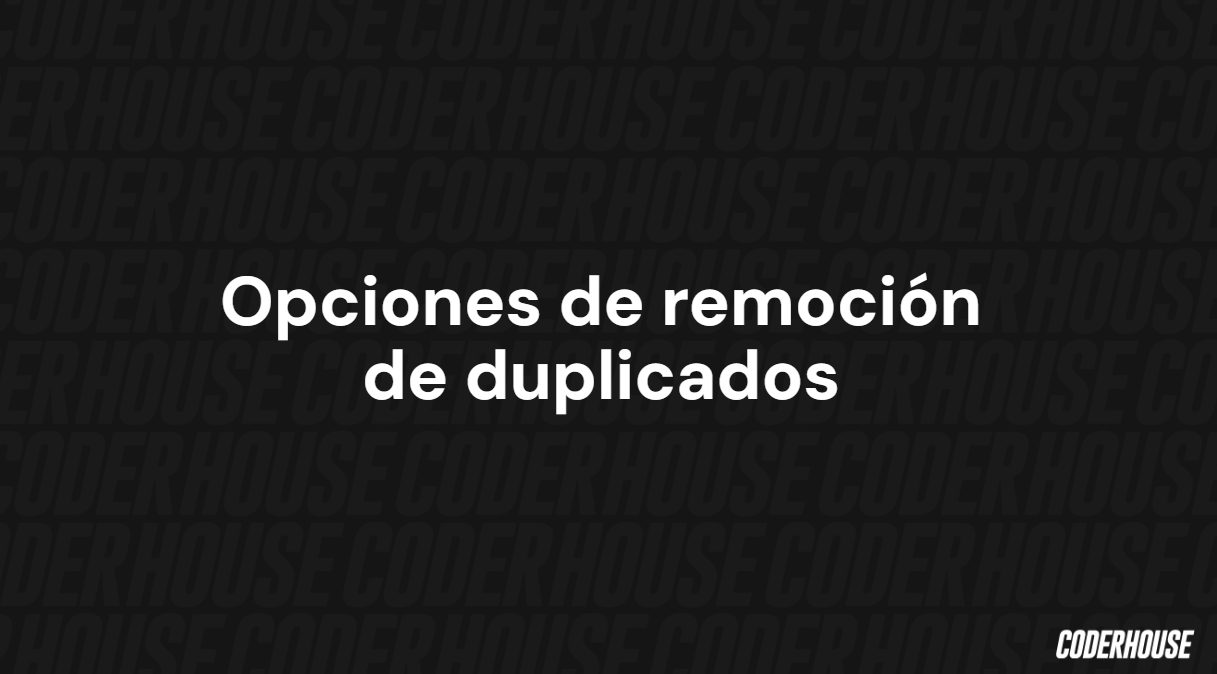

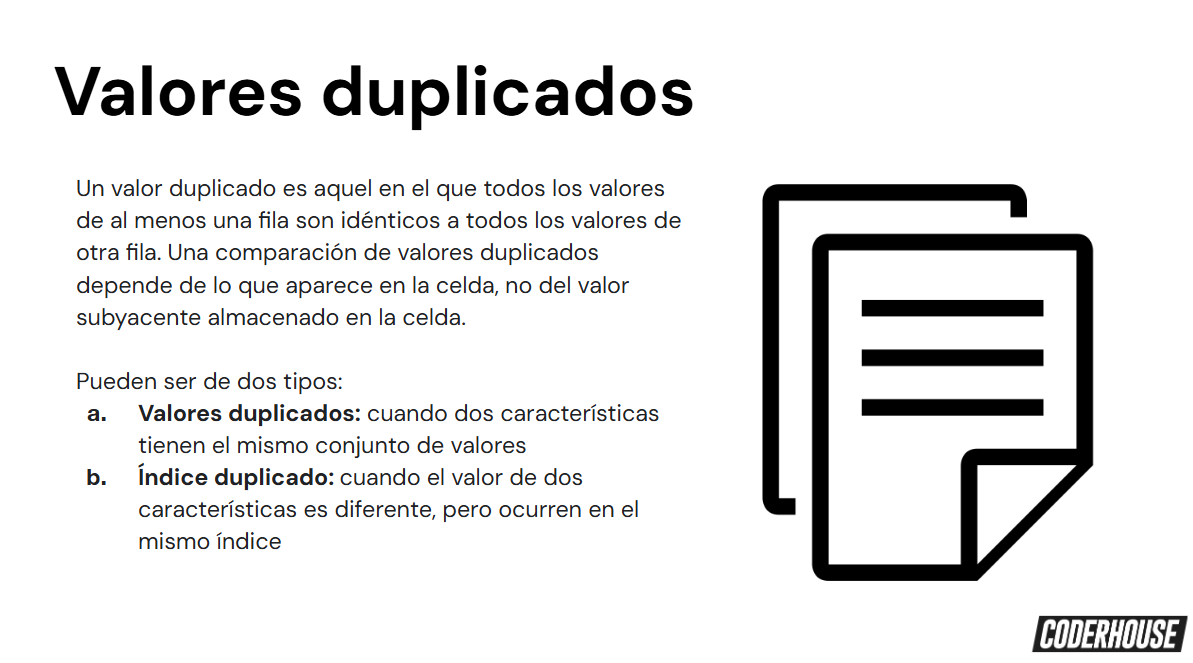

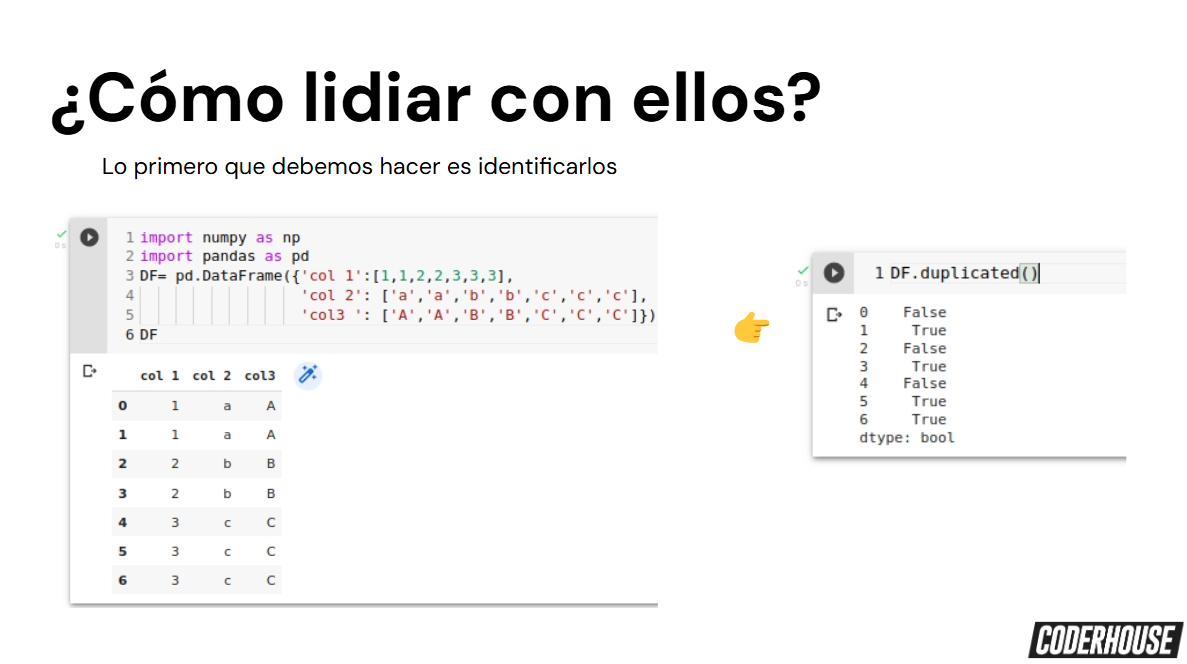

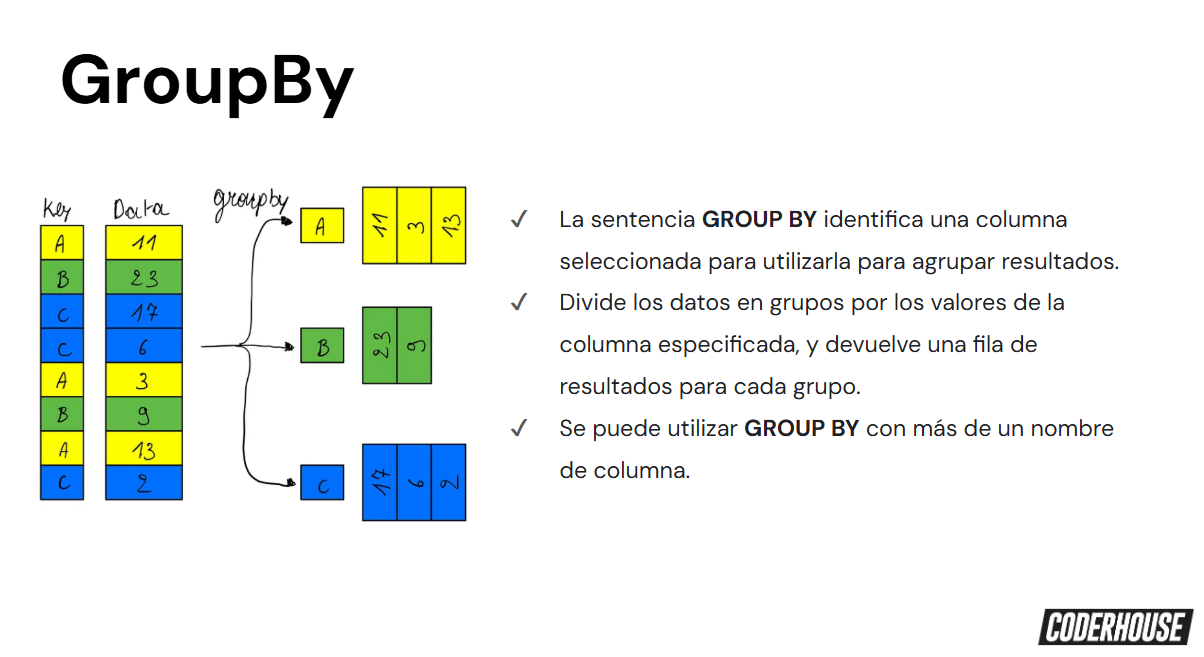

In [ ]:
#Ejemplo 1: Total cobrado por método de pago
# Agrupar por método de pago y sumar montos cobrados
#Objetivo: ver qué método de pago generó más ingresos.
df.groupby('metodo_pago')['monto_total'].sum()


metodo_pago  monto_total
0         Cheque   2329150.06
1         Débito   3298669.35
2       Efectivo   2739086.18
3  Transferencia   3272714.89

In [ ]:
df.groupby('metodo_pago')['monto_total'].sum().reset_index().style.format({'monto_total': '${:,.2f}'})

🍎
- .reset_index -> convierte el índice en una columna normal, y te devuelve un DataFrame "limpio"

- .style.format() es un método de Pandas que te permite aplicar formato visual a un DataFrame
      - "${:,.2f}" → es el formato:

      -  $ = símbolo de pesos (lo podés cambiar por cualquier moneda).

      -  :, = agrega separador de miles.

      -  .2f = muestra dos decimales (formato float).

| Formato | Qué hace                                        | Ejemplo (`1234567.891`) |
| ------- | ----------------------------------------------- | ----------------------- |
| `:.2f`  | Número decimal con 2 decimales                  | `1234567.89`            |
| `:,.2f` | Decimal con separador de miles                  | `1,234,567.89`          |
| `:.0f`  | Entero redondeado                               | `1234568`               |
| `:,.0f` | Entero con miles y sin decimales                | `1,234,568`             |
| `:.2%`  | Porcentaje con 2 decimales (multiplica por 100) | `123456789.10%`         |
| `:e`    | Notación científica                             | `1.234568e+06`          |
| `:,.1f` | Redondea a un decimal y separa miles            | `1,234,567.9`           |


In [ ]:
# Contar cuántas cobranzas hay en cada provincia según el estado del pago
df_2.groupby(['provincia', 'estado_pago']).size().reset_index(name='cantidad')


provincia estado_pago  cantidad
0  Corrientes      Impago        19
1  Corrientes      Pagado        63
2  Corrientes     Parcial        32
3     Mendoza      Impago        30
4     Mendoza      Pagado       148
5     Mendoza     Parcial        49
6       Salta      Impago        13
7       Salta      Pagado        72
8       Salta     Parcial        20

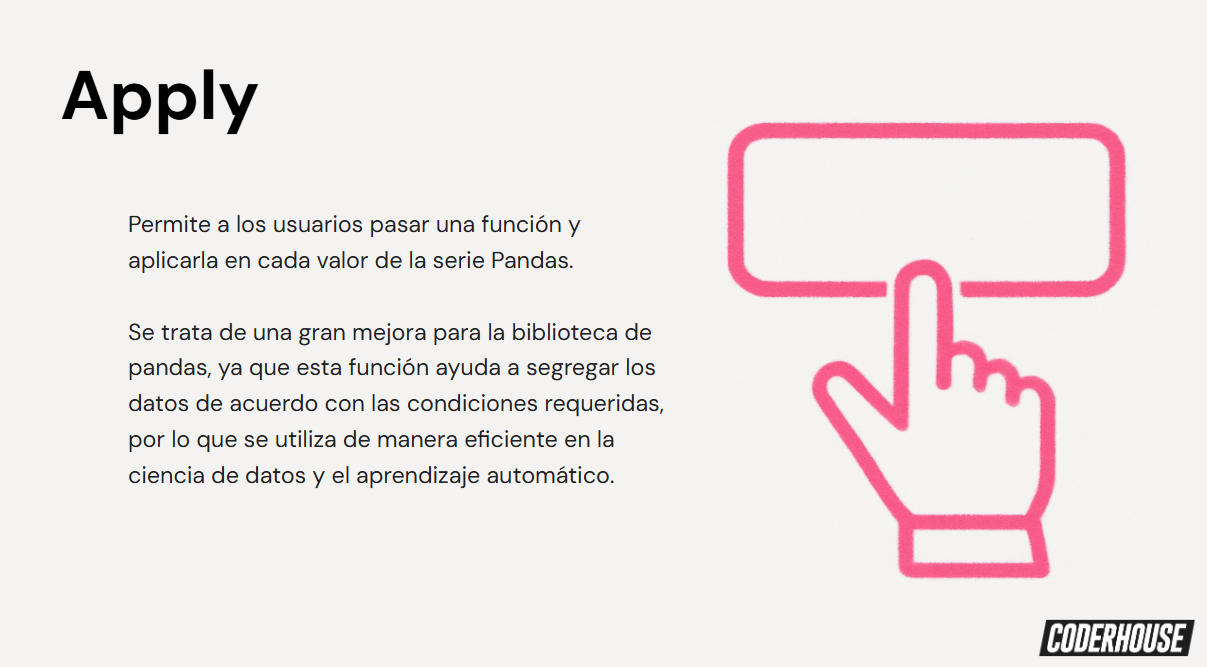

In [ ]:
#Clasificar las cobranzas según el monto

# 1. Función para clasificar los montos
def clasificar_monto(monto):
    if monto > 40000:
        return 'Alta'
    elif monto >= 20000:
        return 'Media'
    else:
        return 'Baja'

# 2. Aplicar la función usando .apply() con .loc
df.loc[:, 'categoria_monto'] = df['monto_total'].apply(clasificar_monto)

# 3. Ver los primeros resultados
print(df[['monto_total', 'categoria_monto']].head())

# 4. Contar cuántas cobranzas hay por categoría
print(df['categoria_monto'].value_counts())

df['categoria_monto'].value_counts()

   monto_total categoria_monto
0     21244.68           Media
1     30169.01           Media
2      7547.38            Baja
3     24725.21           Media
5     21958.32           Media
categoria_monto
Baja     170
Media    164
Alta     112
Name: count, dtype: int64


categoria_monto
Baja     170
Media    164
Alta     112
Name: count, dtype: int64

In [ ]:
#recuento de cuentas que caen en cada categoría

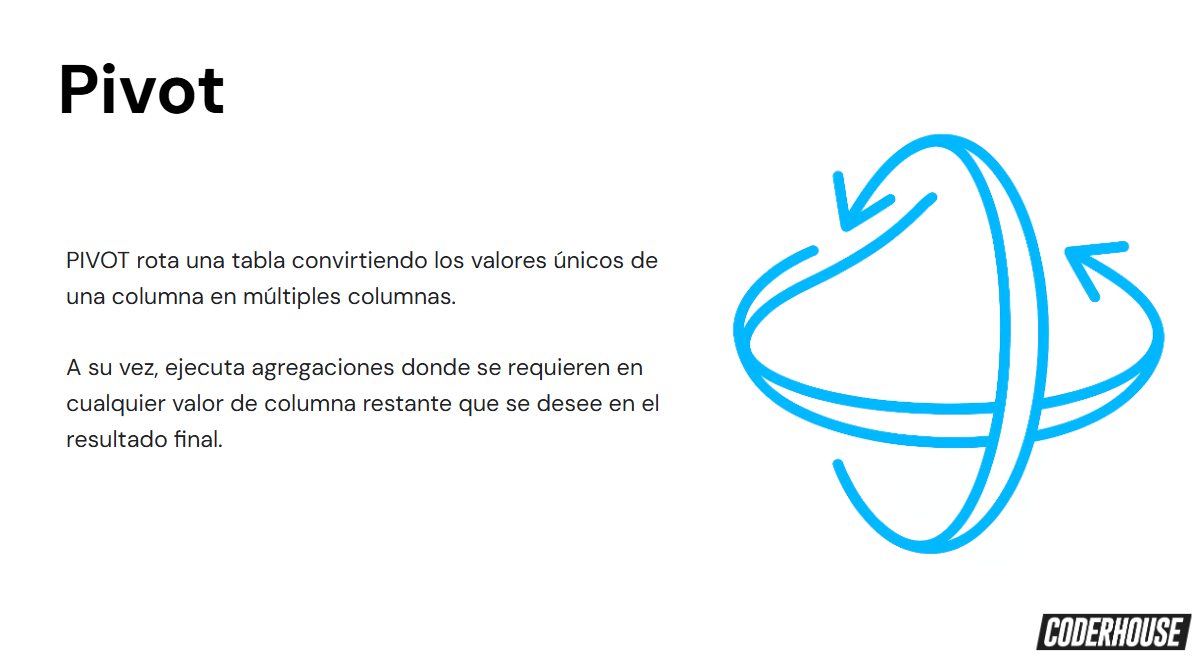

In [ ]:
# 1. Asegurarse de que 'monto_total' no tenga valores nulos
df.loc[:, 'monto_total'] = df['monto_total'].fillna(0)

# 2. Crear tabla pivote
pivot_df = df.pivot_table(
    values='monto_total',         # Qué queremos resumir
    index='tipo_cuenta',          # Qué usamos como filas
    columns='estado_pago',        # Qué convertimos en columnas
    aggfunc='sum',                # Cómo agregamos (suma)
    fill_value=0                  # Rellenar nulos con 0
)

# 3. Mostrar tabla
pivot_df



estado_pago          Impago      Pagado    Parcial
tipo_cuenta                                       
Contado           349515.80  2085346.49  844293.38
Crédito           673273.26  1694830.80  522899.67
Cuenta Corriente  342268.43  1643235.55  803773.18
Cuenta Especial   337706.24  1831678.82  510798.86

# **🍎 PRACTICA #1**

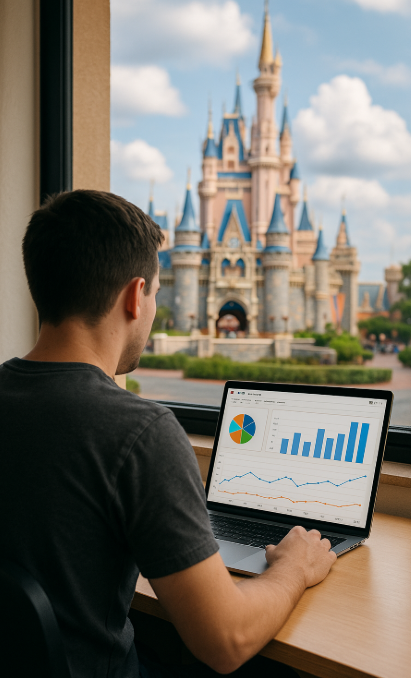

# **🧙 Disney**

- Mostrar cuántos valores nulos hay por columna.

- Reemplazar valores nulos en rating por "No Rating".

- Filtrar todos los títulos agregados a la plataforma en el año 2021.

- Contar cuántos títulos hay de cada tipo (Movie, TV Show).

- Crear una nueva columna que indique si el título fue lanzado antes o después del año 2000.

- Usar .map() para traducir el tipo (Movie → "Película", TV Show → "Serie").

- Eliminar duplicados basados en title.

- Agrupar por release_year y contar cuántos títulos se lanzaron por año.

- Crear una tabla pivote con type como filas y rating como columnas, mostrando cantidad de títulos.

- Ordenar los títulos por año de lanzamiento de más nuevo a más viejo.

**COLAB** : https://colab.research.google.com/drive/1tVzbPABkNvsiH3GMi5plkNGMt3E6P-Bi?usp=sharing


# **🍎 PRACTICA #2**

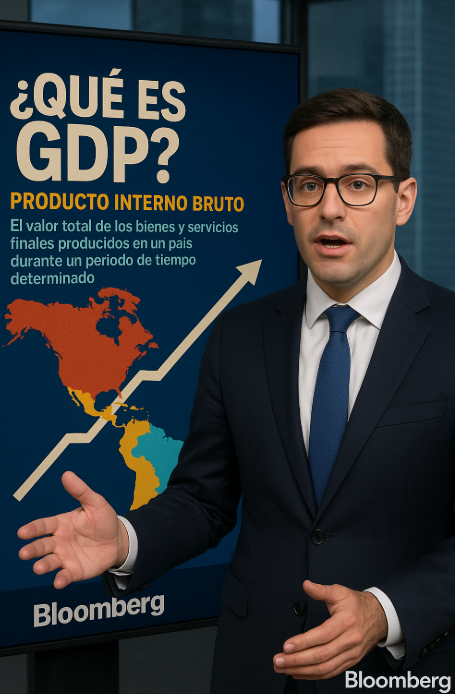

**GPD** Producto Interno Bruto (Gross Domestic Product en inglés).

🍎 El GDP per cápita es una medida económica que representa el ingreso promedio por persona en un país o región, y se calcula dividiendo el GDP total entre la población. Es muy utilizado para comparar el nivel de desarrollo económico entre países.

🍎 **CONSIGNA**

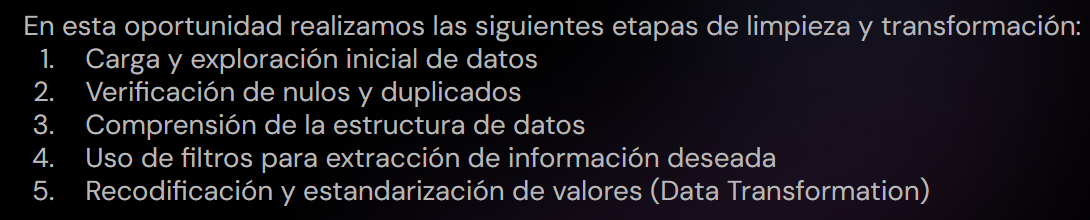

**COLAB:** https://colab.research.google.com/drive/1kch_eT5QYHcVzgNMiwoaFztUNqhlzcLY?usp=sharing


# **🍎 PRACTICA #3**

**datos:**https://drive.google.com/file/d/1EOFWzQPXPqNN3ZrELuOr4Zo7eHGkFvx7/view

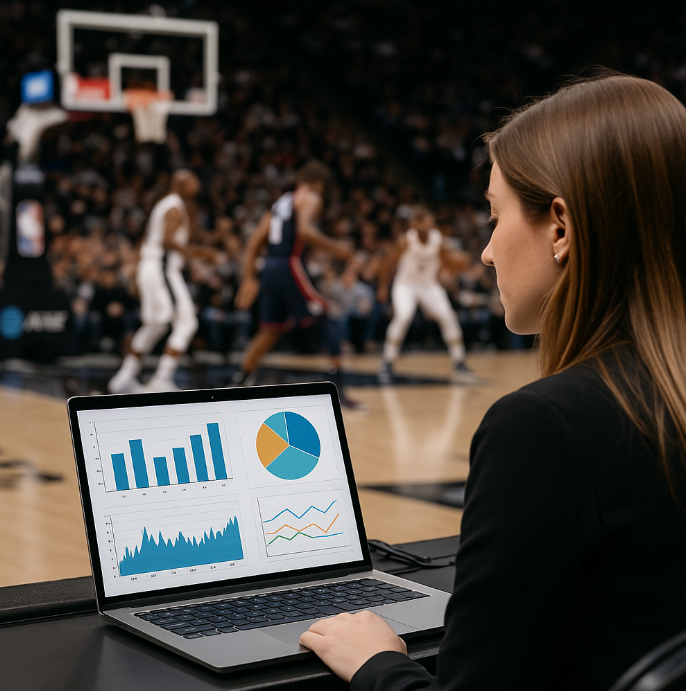

🍎 CONSIGNA

- Utilizaremos el archivo ‘nba_salary.sqlite’ y seguiremos los siguientes pasos.

  - Leer los datos de la base nba_salary.sqlite. Extraer ambas tablas.

  - Ver cuántos datos nulos tiene cada tabla. Analizar que columnas y filas eliminaria
  - De la tabla de Seasons_Stats, seleccionar solo el año 2017. Analizar porque hay varios jugadores que aparecen varias veces en un año. Lo mismo para la tabla From NBA_season1718_salary.
  - Hacer un inner join entre las dos tablas en base al jugador y al equipo que juega con la tabla From NBA_season1718_salary.
  - Agrupar por jugador y calcular el salario total y la cantidad de puntos por año

**COLAB:** https://colab.research.google.com/drive/1vtJSG8FYxYGEgacj3WgAmfmnseE4U056?usp=sharing